In [160]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import webbrowser
import time

In [161]:
from numpy import genfromtxt
data = genfromtxt('Test.csv', delimiter=',')
#data = genfromtxt('testdata1.csv', delimiter=',')

In [162]:
data=pd.DataFrame(data)

In [163]:
scaler=MinMaxScaler(feature_range=(-1,1))
model_testing=scaler.fit_transform(data)

In [164]:
model_testing[0]

array([-0.00425253])

In [165]:
def seq(dataset,seq_size=5):
    x=[]
    y=[]
    for i in range(len(dataset)-seq_size-1):
        window=dataset[i:i+seq_size,0]
        x.append(window)
        y.append(dataset[i+seq_size,0])
    return np.array(x) , np.array(y)


In [166]:
def Prerdict_future(prediction,Next_prediction_size):
    seq_size=5
    x=[]
    y=[]
    for i in range(len(prediction)-Next_prediction_size,len(prediction)):
        if (i+seq_size +5)< len(prediction):
            window=prediction[i:i+seq_size,0]
            x.append(window)
            y.append(prediction[i+seq_size,0])
    return np.array(x) , np.array(y)


In [167]:
seq_size=5
x_test,y_test=seq(model_testing,seq_size)

In [168]:
n_features=1
x_test= x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

In [169]:
from tensorflow import keras 

In [170]:
#from keras.models import load_model
model=keras.models.load_model('model/MyLSTM_Model.h5')

In [171]:
test_predict=model.predict(x_test)
test_predict1=scaler.inverse_transform(test_predict)
y_test1=scaler.inverse_transform([y_test])
y_test1=y_test1.T

19/19 [==============================] - 1s 5ms/step


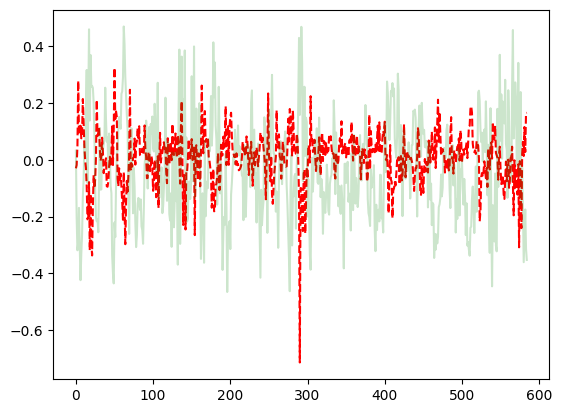

In [172]:
plt.plot(test_predict1, color='r', linestyle='--')
plt.plot(y_test1, color='g', alpha=0.2)
plt.savefig('static/images/y_test1.png')

In [179]:
Next_prediction_size=int(len(test_predict1)*0.1)
Next_prediction_size
predicted_x_test,predicted_y_test=Prerdict_future(test_predict1,Next_prediction_size)

In [180]:
n_features=1
predicted_x_test= predicted_x_test.reshape((predicted_x_test.shape[0], predicted_x_test.shape[1], n_features))

In [181]:
next_test_predict=model.predict(predicted_x_test)
test_predict2=scaler.inverse_transform(next_test_predict)
y_test2=scaler.inverse_transform([predicted_y_test])
y_test2=y_test2.T
test = np.zeros((len(test_predict1),1), dtype=int)
test =np.concatenate((test, test_predict2))

2/2 [==============================] - 0s 8ms/step


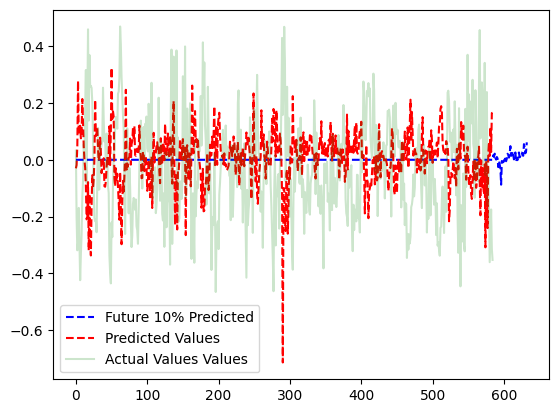

In [197]:
plt.plot(test, color='b', linestyle='--', label='Future 10% Predicted')
plt.plot(test_predict1, color='r', linestyle='--', label='Predicted Values')
plt.plot(y_test1, color='g', alpha=0.2, label='Actual Values Values')
plt.legend()
plt.savefig('static/images/y_test1.png')

In [183]:
import math
from sklearn.metrics import mean_squared_error
test_score=math.sqrt(mean_squared_error(y_test,test_predict1))
test_score

0.4272367914104655

In [ ]:
#model.summary()

In [ ]:
#plt.gca().invert_yaxis()